# KNN 아이리스 2진분류 (Binary Classification)
---

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# import warnings
# warnings.filterwarnings('ignore')

### 데이터 준비

In [1]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/iris.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/iris.csv
To: C:\Users\019\workspace\flyai\P\iris.csv

  0%|          | 0.00/1.16k [00:00<?, ?B/s]
5.11kB [00:00, 4.90MB/s]                   


In [53]:
iris = pd.read_csv('iris.csv')
iris.shape

(150, 6)

In [54]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
df = iris.drop(['Id'], axis=1).copy()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [57]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
# 2진 데이터 

df = df.loc[df['species'] != 'Iris-virginica']

In [59]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

In [60]:
df['species']= df['species'].map({
    'Iris-setosa':0,
    'Iris-versicolor':1
})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
# X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# y = df['species']


In [12]:
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

In [13]:
X = df.drop(['species'], axis=1)
y = df['species']

X.shape, y.shape

((150, 4), (150,))

In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

### 테스트 데이터 분리

In [15]:
# !pip install scikit-learn --user

In [21]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

num = int(150*0.8)
X_train = X.iloc[:num,:]        #120  
X_test = X.iloc[num:,:]         #30
y_train = y.iloc[:num]        # 120
y_test  = y.iloc[num:]        # 30

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


### 정규화
- 최소-최대 정규화
- 표준화

![](https://velog.velcdn.com/images%2Fdyeudsla%2Fpost%2Fe7aed687-f282-44e8-9c82-e101c69503a2%2Fimage.png)

In [22]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
42,4.4,3.2,1.3,0.2
49,5.0,3.3,1.4,0.2
68,6.2,2.2,4.5,1.5
97,6.2,2.9,4.3,1.3
52,6.9,3.1,4.9,1.5


In [29]:

for col in X_train.columns:
    mu = X_train[col].mean()
    std = X_train[col].std()
    X_train[col] = (X_train[col] - mu)/std
    X_test[col] = (X_test[col] - mu)/std

C:\Users\kamibot\AppData\Local\Temp\ipykernel_11792\252330780.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col] - mu)/std


In [32]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
42,-1.789463,0.330273,-1.450546,-1.350311
49,-1.070883,0.558048,-1.393662,-1.350311
68,0.366276,-1.947472,0.369747,0.343005
97,0.366276,-0.353051,0.255979,0.082495
52,1.204619,0.102499,0.597284,0.343005


In [36]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,120.0,6.957398e-16,1.0,-1.789463,-0.951120,-0.112777,0.635743,2.402251
sepal_width,120.0,6.217249e-16,1.0,-2.403021,-0.580825,-0.125276,0.558048,3.063568
petal_length,120.0,-5.921189e-17,1.0,-1.507430,-1.279893,0.369747,0.711052,1.734966
petal_width,120.0,-2.220446e-16,1.0,-1.480566,-1.220056,0.212750,0.733770,1.645556


In [37]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [39]:
X_train = X_train.values
y_train = y_train.values

In [40]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

### 데이터 전처리 함수

In [63]:
def get_iris(mode=None):
    iris = pd.read_csv('iris.csv')
    df = iris.drop(['Id'], axis=1).copy()
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    
    if(mode == 'bin'):
        df = df.loc[df['species'] != 'Iris-virginica']
        
    df['species']= df['species'].map({
        'Iris-setosa':0,
        'Iris-versicolor':1,
        'Iris-virginica':2
    })
    X = df.drop(['species'], axis=1)
    y= df['species']

    X, y = shuffle(X, y, random_state=2022)
    num = int(len(y)*0.8)
    
    X_train = X.iloc[:num,:]    
    X_test = X.iloc[num:,:]      
    y_train = y.iloc[:num]        
    y_test  = y.iloc[num:]       
    
    for col in X_train.columns:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col] - mu)/std
        X_test[col] = (X_test[col] - mu)/std

    return X_train, X_test, y_train, y_test

In [68]:
X_train, X_test, y_train, y_test = get_iris('bin')

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


# 이진데이터 데이터 준비
---

In [72]:
X_train, X_test, y_train, y_test = get_iris('bin')

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


In [73]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### 학습

In [74]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

### 평가

In [75]:
# 테스트 
clf.score(X_test, y_test)

1.0

In [76]:
clf.score(X_train, y_train)

1.0

In [77]:
# 예측 
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [78]:
y_test

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [81]:
# y_pred, y_test 정확도를 계산

(y_pred == y_test).sum()/len(y_test)

1.0

In [86]:
# 평가지표  metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)

    print('accuraccy:', acc)
    print('precision:', pre)
    print('recall:', rec)


In [87]:
print_score(y_test, y_pred)

accuraccy: 1.0
precision: 1.0
recall: 1.0


### 혼동행렬 (Confusion Matrix)

In [98]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[ 5,  0],
       [ 0, 15]], dtype=int64)

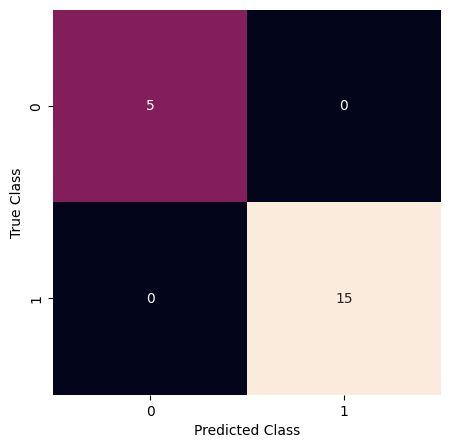

In [96]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cfm, annot=True, cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()